<a href="https://colab.research.google.com/github/saud-py/EDA-cleaning-/blob/main/EDA_CleaningBCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import zscore as zscore

In [56]:
#read in dataset
url = 'https://raw.githubusercontent.com/saud-py/EDA-cleaning-/main/ml_case_training_data.csv'
url2 = 'https://raw.githubusercontent.com/saud-py/EDA-cleaning-/main/ml_case_training_hist_data.csv'
url3 = 'https://raw.githubusercontent.com/saud-py/EDA-cleaning-/main/ml_case_training_output.csv'

#list of dates
dt_lst = ['date_activ','date_end','date_first_activ','date_modif_prod','date_renewal']

#data importing 
pco_main = pd.read_csv(url, parse_dates=dt_lst) #index_col='date_activ')
pco_hist = pd.read_csv(url2, parse_dates=['price_date']) #yearly history of consumption per user
pco_output = pd.read_csv(url3)
pd.set_option('display.max_columns',None)

In [57]:
#Replace the churn column with appropriate 
pco_output['churn']  = pco_output['churn'].replace({0:'Stayed',1:'Churned'})

#to have a glimpse of the data
pco_output.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,Stayed
1,24011ae4ebbe3035111d65fa7c15bc57,Churned
2,d29c2c54acc38ff3c0614d0a653813dd,Stayed
3,764c75f661154dac3a6c254cd082ea7d,Stayed
4,bba03439a292a1e166f80264c16191cb,Stayed


In [58]:
#what number of customers have churned in the last 3 months?
attrition_count = pco_output['churn'].value_counts()
print('Total Number of Churned Customers:\n', attrition_count)

Total Number of Churned Customers:
 Stayed     14501
Churned     1595
Name: churn, dtype: int64


In [59]:
#what is th proportion of customer attrition in the last 3 months:
attrition_rate = pco_output['churn'].value_counts() / pco_output.shape
[0] * 100
print('Attrition rate:\n', attrition_rate)

Attrition rate:
 Stayed       0.900907
Churned    797.500000
Name: churn, dtype: float64


In [60]:
#displaying the yearly consumption of energy and power of customers 
pco_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [61]:
#examing the structure of the dataframe
pco_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            193002 non-null  object        
 1   price_date    193002 non-null  datetime64[ns]
 2   price_p1_var  191643 non-null  float64       
 3   price_p2_var  191643 non-null  float64       
 4   price_p3_var  191643 non-null  float64       
 5   price_p1_fix  191643 non-null  float64       
 6   price_p2_fix  191643 non-null  float64       
 7   price_p3_fix  191643 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [62]:
#examine the descriptive statistics of the dataframe
pco_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [63]:
#identify the nullify of the dataframe
missing_values_hist = pco_hist.isna().sum()
print('Total missing values:\n', missing_values_hist)

Total missing values:
 id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64


In [64]:
#identifying the percentage of nullify in the dataframe fir each column
missing_values_hist_perc = pco_hist.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_hist_perc) 

Percentage of Missing Values:
 id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64


In [65]:
#print header
pco_main.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,NaT,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [66]:
#print info
pco_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   campaign_disc_ele         0 non-null      float64       
 3   channel_sales             11878 non-null  object        
 4   cons_12m                  16096 non-null  int64         
 5   cons_gas_12m              16096 non-null  int64         
 6   cons_last_month           16096 non-null  int64         
 7   date_activ                16096 non-null  datetime64[ns]
 8   date_end                  16094 non-null  datetime64[ns]
 9   date_first_activ          3508 non-null   datetime64[ns]
 10  date_modif_prod           15939 non-null  datetime64[ns]
 11  date_renewal              16056 non-null  datetime64[ns]
 12  forecast_base_bill

In [67]:
#identify the percentage of nullity in the dataframe for each column
missing_values_main_perc = pco_main.isnull().mean() * 100
print('Percentage of missing values:\n', missing_values_main_perc)

Percentage of missing values:
 id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.0

In [68]:
#examine the descriptive statistics of the main dataset
pco_main.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [69]:
#identify negative columns
negative_cols = ['price_p1_fix', 'price_p2_fix', 'price_p3_fix']

#convert the negativeto positive in pco_hist
pco_hist[negative_cols] = pco_hist[negative_cols].apply(abs)

pco_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325563,10.698210,6.455443
std,0.025117,0.050033,0.036335,5.437816,12.856039,7.782273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


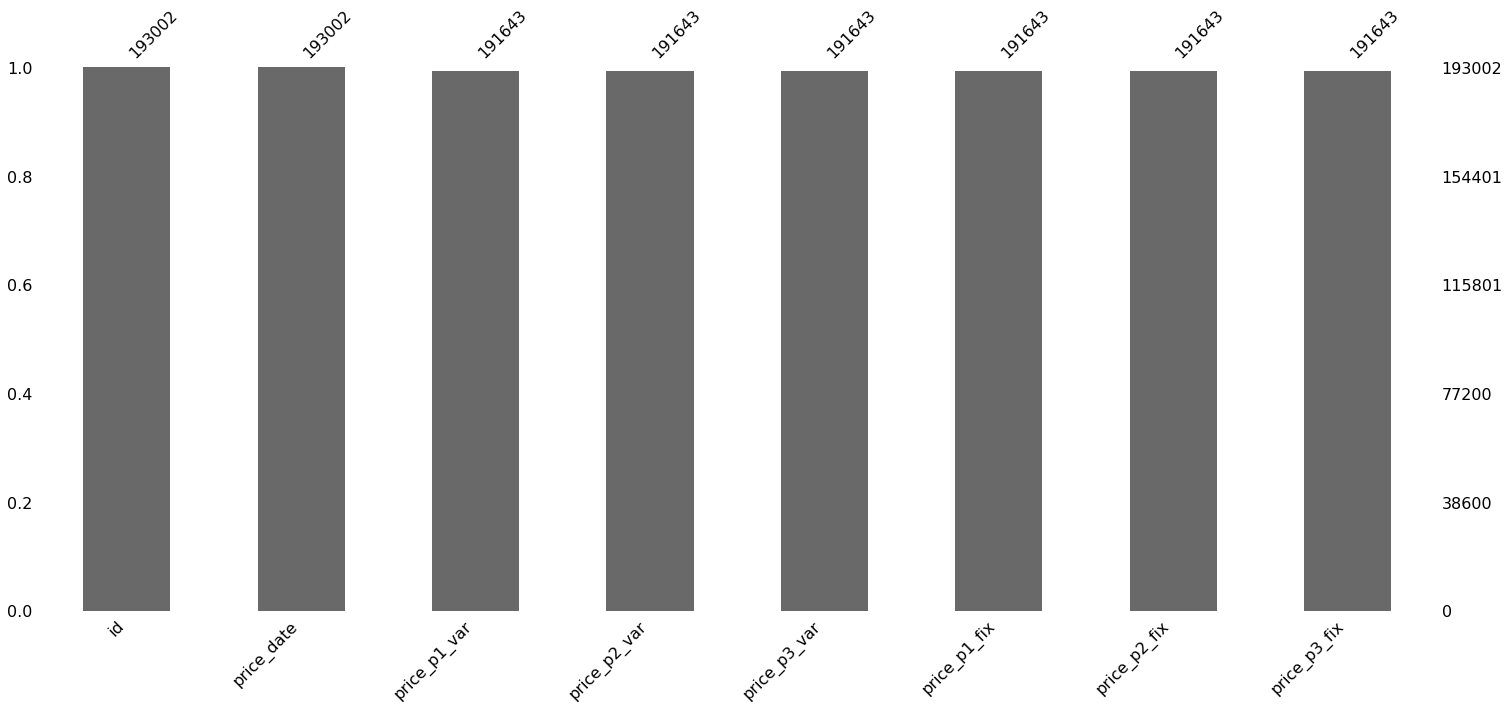

In [70]:
#visualise the completeness of the dataframe
msno.bar(pco_hist) #msno in python means missingno library

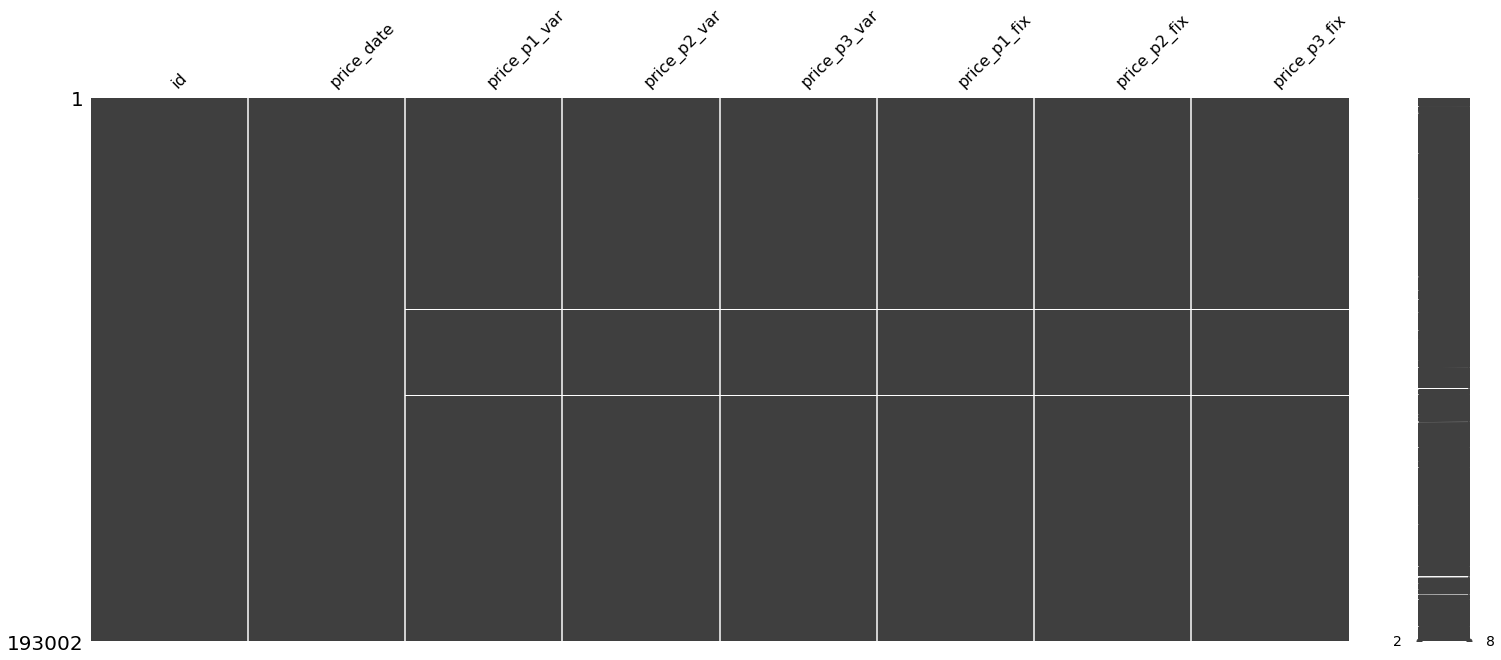

In [71]:
#visualise the location of the missing values of the dataset
sorted = pco_hist.sort_values(by = ['id', 'price_date'])
msno.matrix(sorted) 

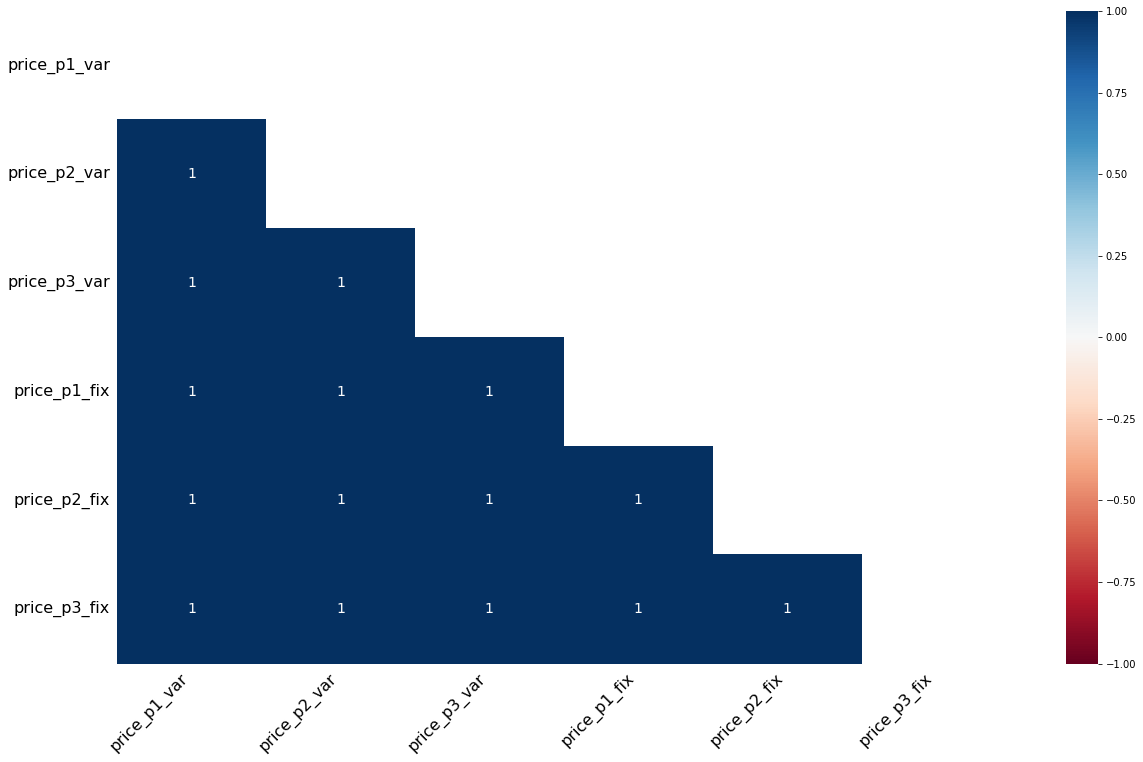

In [72]:
#visualise the correlation between the numeric variables of the dataframe 
msno.heatmap(pco_hist)

In [73]:
#identify the index of the IDs containg missing values
hist_NAN_index = pco_hist[pco_hist.isnull().any(axis=1)].index.values.tolist()

#obtain a dataframe with the missing values
pco_hist_missing = pco_hist.iloc[hist_NAN_index, :]

#glimpse at the NaN cases of the pco_hist dataset
pco_hist_missing.head(10)



,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
471,33bb3af90650ac2e9ecac6ff2c975a6b,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
472,33bb3af90650ac2e9ecac6ff2c975a6b,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN
475,33bb3af90650ac2e9ecac6ff2c975a6b,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
476,33bb3af90650ac2e9ecac6ff2c975a6b,2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN
874,0e90101b08183cc9548e827e4b256f47,2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#extract the unique dates of missing data
date_lst = pco_hist_missing['price_date'].unique()
id_lst = pco_hist_missing['id'].unique()

#create a time dataframe with the unique dates
time_df = pd.DataFrame(data=date_lst, columns=['price_date'])

#glimse the time dataframe
time_df.sort_values(by=['price_date'])

,price_date
9,2015-01-01
11,2015-02-01
8,2015-03-01
0,2015-04-01
2,2015-05-01
1,2015-06-01
10,2015-07-01
3,2015-08-01
4,2015-09-01
7,2015-10-01


In [75]:
#make a copy of pco_hist data set
pco_hist_ff = pco_hist.copy(deep=True)

#print prior to imputing misssing values
print(pco_hist_ff.iloc[hist_NAN_index,3:9].head()) 

#fill NaNs using forward fill
pco_hist_ff.fillna(method = 'ffill', inplace=True)

print(pco_hist_ff.iloc[hist_NAN_index, 3:9].head())

     price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix
75            NaN           NaN           NaN           NaN           NaN
221           NaN           NaN           NaN           NaN           NaN
377           NaN           NaN           NaN           NaN           NaN
413           NaN           NaN           NaN           NaN           NaN
461           NaN           NaN           NaN           NaN           NaN
     price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix
75       0.000000      0.000000     44.266931      0.000000      0.000000
221      0.000000      0.000000     44.266931      0.000000      0.000000
377      0.087970      0.000000     44.266931      0.000000      0.000000
413      0.102239      0.070381     40.565969     24.339581     16.226389
461      0.000000      0.000000     44.266931      0.000000      0.000000


In [76]:
pco_hist_ff.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141006,0.054376,0.030689,43.326213,10.689406,6.450494
std,0.025091,0.050040,0.036333,5.431161,12.853850,7.781323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085450,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [77]:
#merge output dataset with historical forward fill dataset
pco_hist_ff_merged = pco_hist_ff.merge(right=pco_output, on=['id'])
pco_hist_ff_merged.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Stayed
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Stayed
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Stayed
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,Stayed
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,Stayed


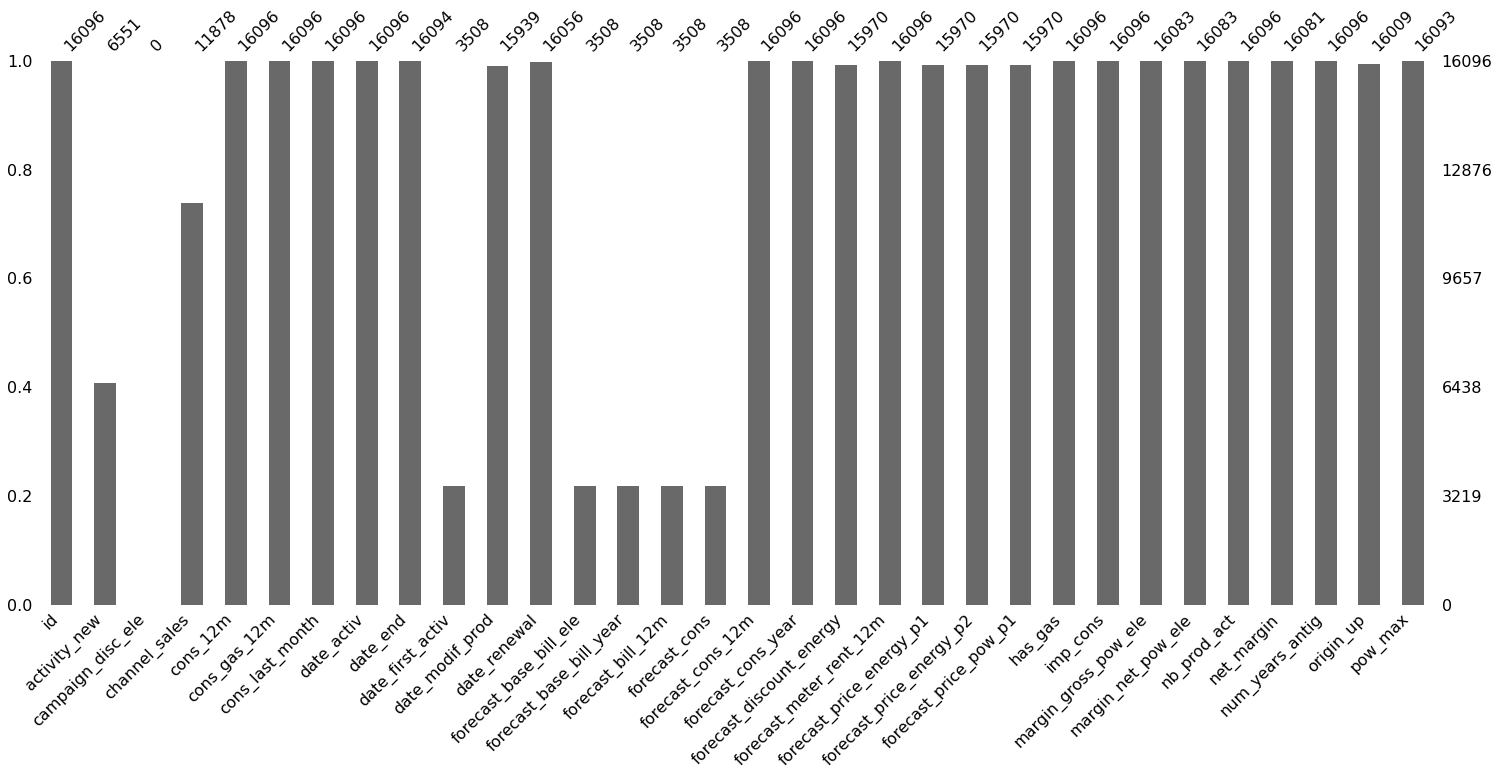

In [31]:
#visualise the completeness of the dataframe 
msno.bar(pco_main)

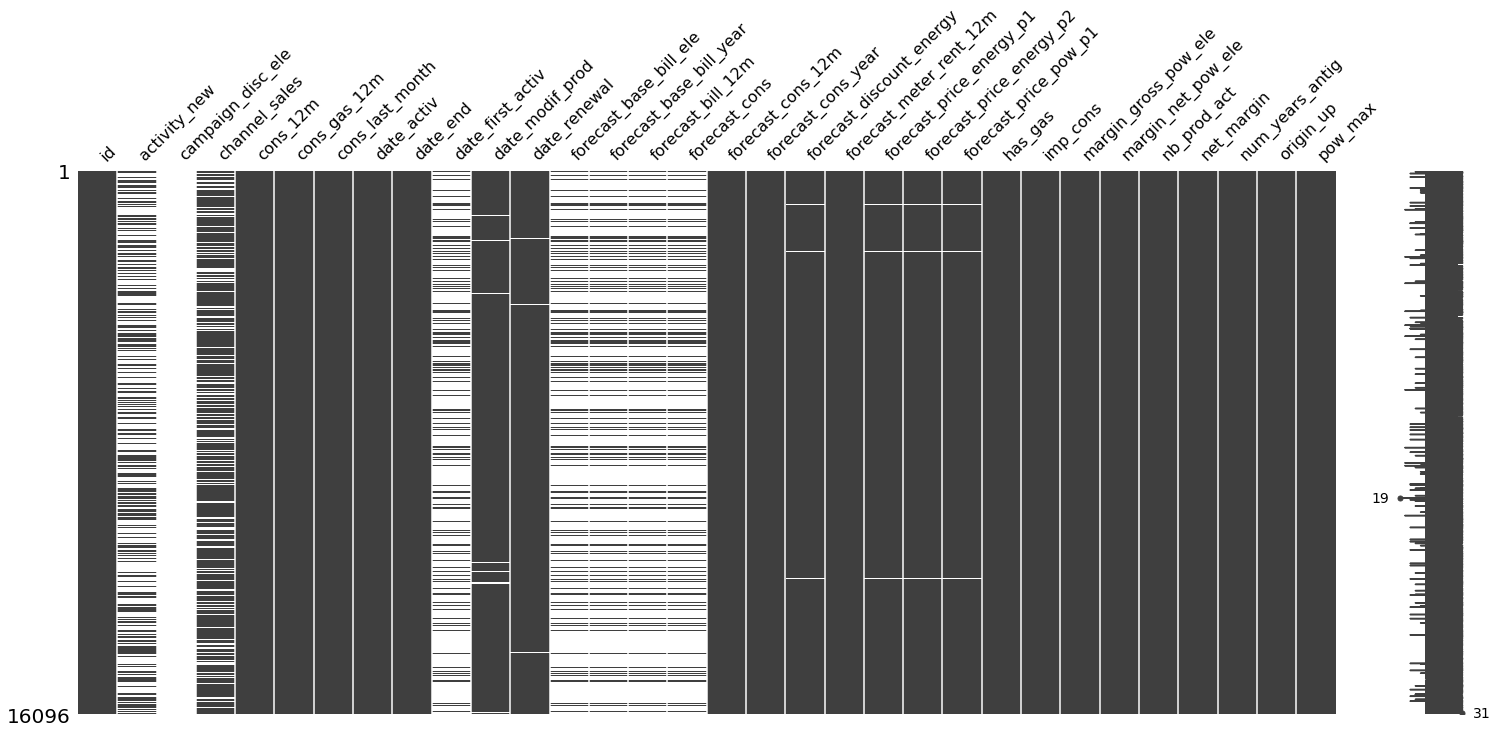

In [78]:
#visulise the locations of the missing values of the dataset
msno.matrix(pco_main)

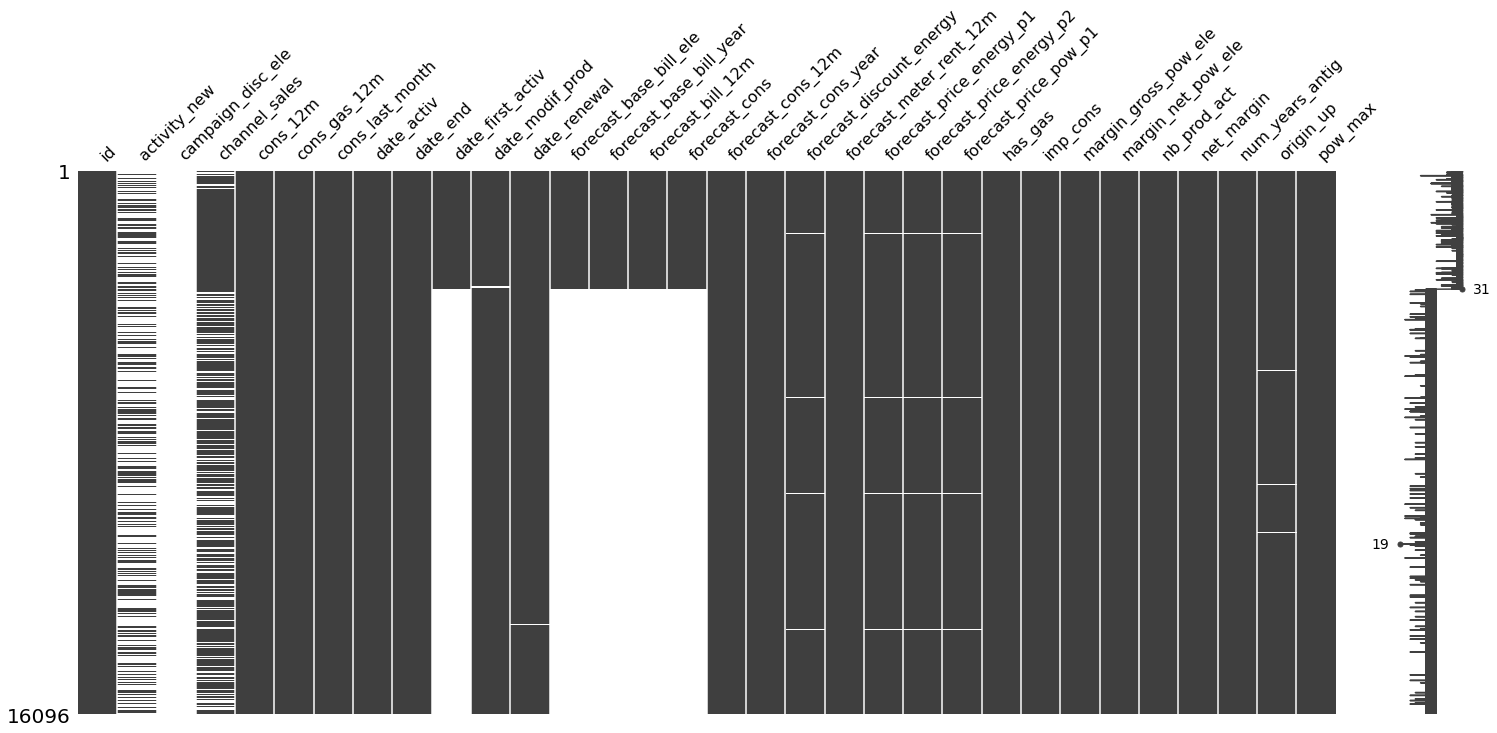

In [79]:
sorted_main = pco_main.sort_values('date_first_activ')
msno.matrix(sorted_main)

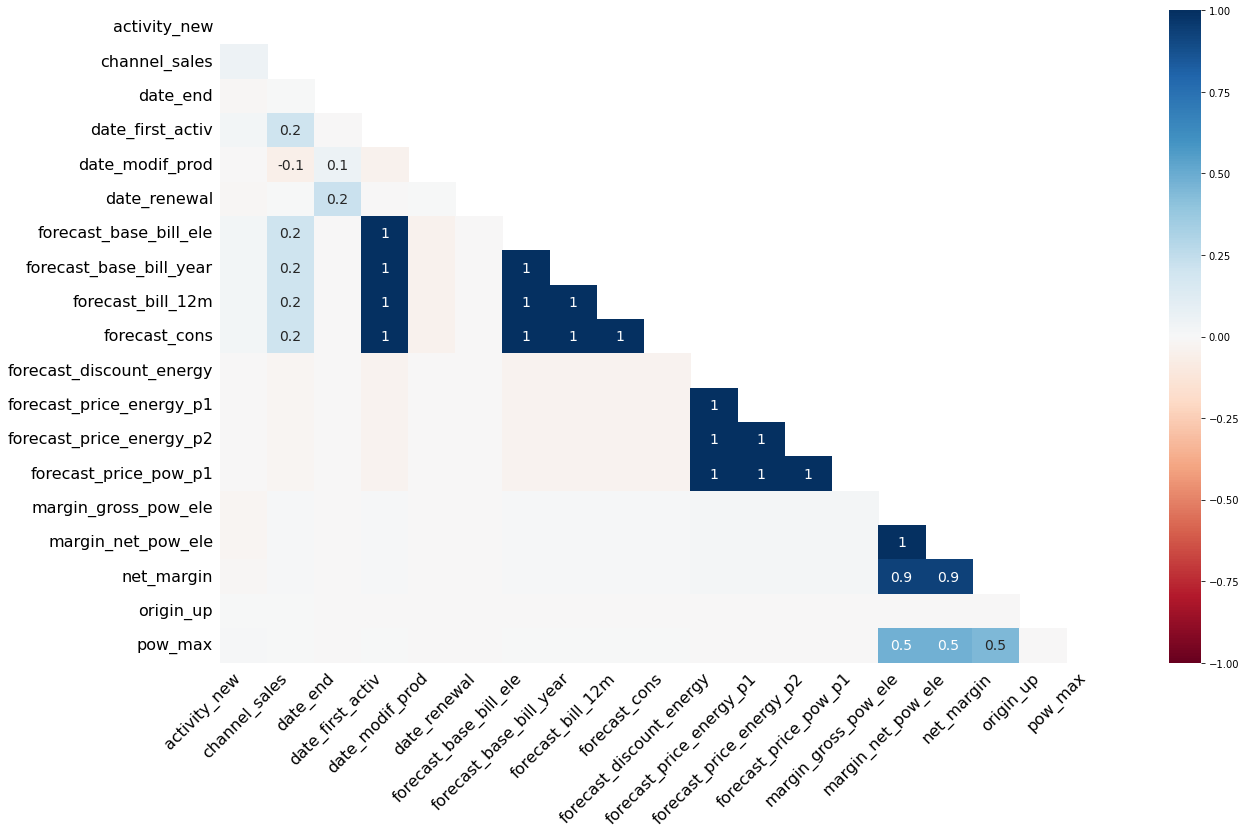

In [80]:
msno.heatmap(pco_main)

In [81]:
#demonstrate why the data_activ column cannot replace completely date_first_activ
activity = ['date_activ','date_first_activ']

#filter the columns of interest
pco_activity = pco_main[activity]

#obtain only the complete cases
pco_activity_cc = pco_activity.dropna(subset=['date_first_activ'],how='any',inplace=False)

#test whether two objects contain the same elements
pco_activity_cc.date_activ.equals(pco_activity_cc.date_first_activ)

#describe it
pco_activity_cc.describe(datetime_is_numeric=True)


,date_activ,date_first_activ
count,3508,3508
mean,2011-09-03 07:45:05.131127552,2011-06-19 20:20:23.261114880
min,2003-09-23 00:00:00,2001-01-10 00:00:00
25%,2010-10-26 00:00:00,2010-08-04 18:00:00
50%,2012-01-03 00:00:00,2011-10-28 00:00:00
75%,2012-08-08 00:00:00,2012-06-22 06:00:00
max,2014-09-01 00:00:00,2014-09-01 00:00:00


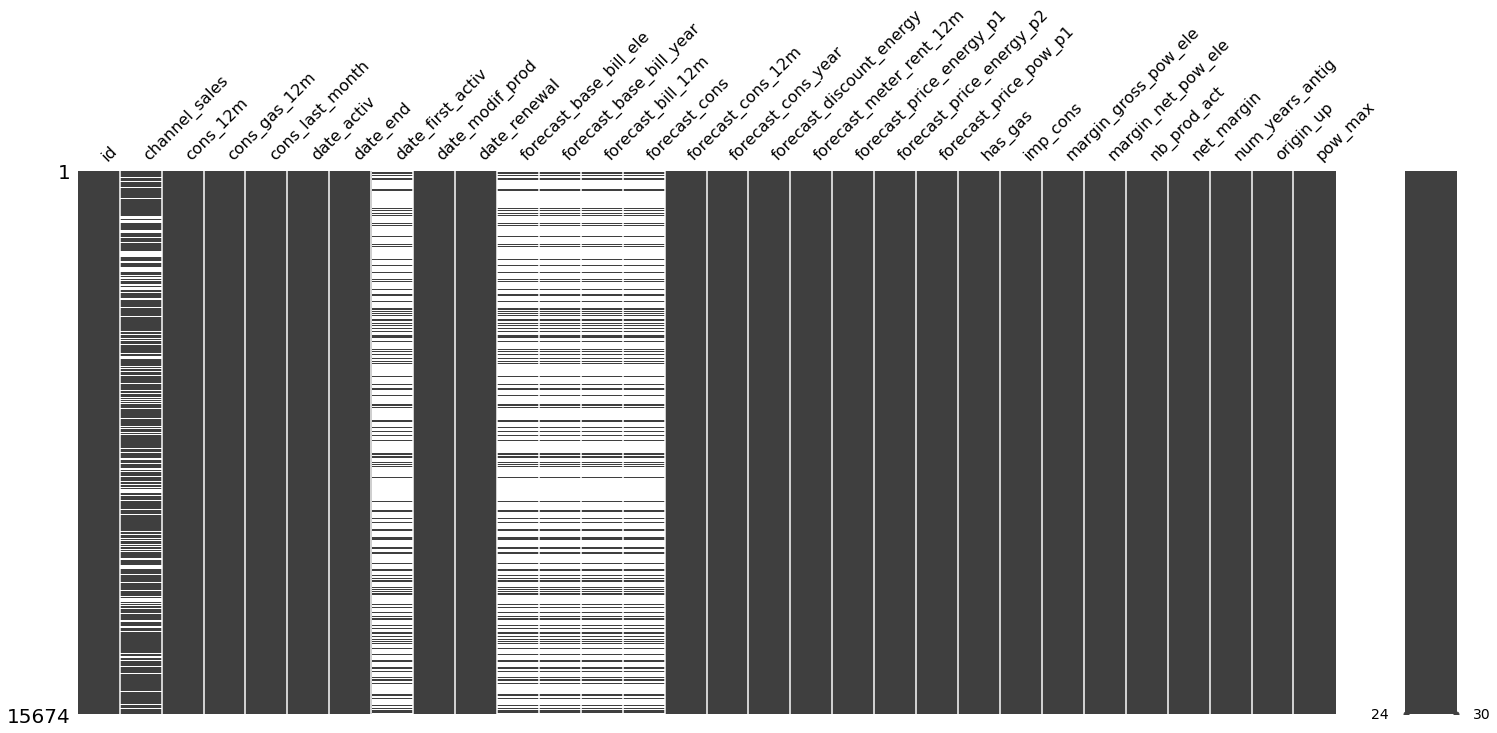

In [82]:
#drop the column activity_new and compaign_disc_elec
pco_main_drop = pco_main.drop(labels = ['activity_new','campaign_disc_ele'], axis=1)

brush = ['date_end','date_modif_prod','date_renewal','origin_up','pow_max','margin_gross_pow_ele','margin_net_pow_ele','net_margin','forecast_discount_energy','forecast_price_energy_p1','forecast_price_energy_p2','forecast_price_pow_p1']
pco_main_drop.dropna(subset=brush, how='any',inplace=True)

msno.matrix(pco_main_drop)

In [83]:
#choss thee columns without missing values
incomplete_cols = ['channel_sales','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons']

complete_cols = [column_name for column_name in pco_main_drop.columns if column_name not in incomplete_cols]

pco_main_cc = pco_main_drop[complete_cols]

numeric = [column_name for column_name in pco_main_cc.columns if pco_main_cc[column_name].dtype == 'float64' or pco_main_cc[column_name].dtype == 'int64']

pco_main_cc[numeric] = pco_main_cc[numeric].apply(abs)

pco_main_cc.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.567400e+04,1.567400e+04,1.567400e+04,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,1.916143e+05,3.132400e+04,1.941588e+04,2359.676441,1911.698354,0.976139,70.210965,0.135925,0.052858,43.522191,196.641669,23.556272,24.125235,1.348092,221.259158,5.052188,20.438270
std,6.724688e+05,1.716291e+05,8.226881e+04,3979.605687,5224.813531,5.124103,78.560454,0.026282,0.048638,5.221651,490.956048,22.456277,25.599218,1.475092,362.053657,1.670284,21.164053
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.893250e+03,0.000000e+00,0.000000e+00,514.045000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,12.360000,12.360000,1.000000,52.802500,4.000000,12.500000
50%,1.522000e+04,0.000000e+00,9.090000e+02,1178.970000,382.000000,0.000000,19.430000,0.142881,0.086163,44.311378,44.870000,21.090000,21.090000,1.000000,120.545000,5.000000,13.856000
75%,4.953825e+04,0.000000e+00,4.131500e+03,2677.220000,1994.750000,0.000000,131.500000,0.146348,0.098837,44.311378,217.962500,29.640000,29.760000,1.000000,275.797500,6.000000,19.800000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,525.540000,615.660000,32.000000,24570.650000,16.000000,500.000000


In [84]:
#convert the has_gas column to yes/no
pco_main_cc['has_gas'] = pco_main_cc['has_gas'].replace({'t':'yes','f':'No'})

pco_main_cc_merged = pco_main_cc.merge(right=pco_output,on=['id'])

pco_main_cc_merged['churn'] = pco_main_cc_merged['churn'].replace({1:'Churned',0:'Stayed'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
pco_main_cc_merged.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,No,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,Stayed
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,No,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,Stayed
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,No,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,Stayed
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,No,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,Stayed
4,568bb38a1afd7c0fc49c77b3789b59a3,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,No,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,Stayed


In [86]:
#obtain all the variables except for id
variables = [column_name for column_name in pco_main_cc_merged.columns if column_name != 'id']

#obtain all the categorical variables except for id
categorical = [column_name for column_name in variables if pco_main_cc_merged[column_name].dtype == 'object']

#obtain all the date variables
dates = [column_name for column_name in variables if pco_main_cc_merged[column_name].dtype == 'datetime64[ns]']

#obtain all the numeric columns
numeric = [column_name for column_name in variables if column_name not in categorical and column_name not in categorical and column_name != 'id' and column_name != 'churn' and column_name not in dates] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


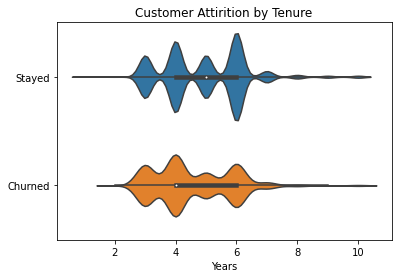

In [87]:
#calculate the zscores of tenure 
tenure_zcores = zscore(a=pco_main_cc_merged['num_years_antig'])
#convert to absolute values
abs_tenure_zcores = np.abs(tenure_zcores)
#extract columns of interest
churn_tenure = pco_main_cc_merged[['churn','num_years_antig']]
#add z-score column
churn_tenure['z_score'] = list(abs_tenure_zcores)
#remove outlines
churned_tenure_filtered = churn_tenure[churn_tenure['z_score'] <3]
#visualise tenure by retained customer and chuner 
vio = sns.violinplot(y=churned_tenure_filtered["churn"], x=churned_tenure_filtered["num_years_antig"])
#settings
vio.set(xlabel='Years',ylabel='')
vio.set_title("Customer Attirition by Tenure")
plt.show()

In [88]:
ele_nm = pco_main_cc_merged.loc[(pco_main_cc_merged['churn']>='Stayed') & (pco_main_cc_merged['net_margin']>0),['id','origin_up','net_margin']]

ele_nm.value_counts(subset=['origin_up'])

origin_up                       
lxidpiddsbxsbosboudacockeimpuepw    6584
kamkkxfxxuwbdslkwifmmcsiusiuosws    4188
ldkssxwpmemidmecebumciepifcamkci    3201
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
dtype: int64

In [89]:
print(ele_nm.groupby('origin_up')['net_margin'].agg('sum').sort_values(ascending=False))

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1541159.95
ldkssxwpmemidmecebumciepifcamkci     814230.02
kamkkxfxxuwbdslkwifmmcsiusiuosws     717939.95
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64


In [90]:
top_customers = pco_main_cc_merged.loc[(pco_main_cc_merged['churn']>='Stayed') & (pco_main_cc_merged['net_margin']>0),['id','num_years_antig','net_margin']]

top_customers.sort_values(by=['net_margin'],ascending=False).head(10)

,id,num_years_antig,net_margin
11502,d00e8a9951b5551d8f02e45f9ed2b0dd,3,10203.50
6930,78bd1c5c0c67f2be6de89b19df5f8861,3,5625.14
13259,818b8bca0a9d7668252d46b978169325,4,4346.37
8378,a3a739686fbd5ba8b4a21ec835507b6d,4,4305.79
324,89b3406c3ba717f1b788ceeb5af9e8b9,3,4161.74
10100,93435ecb05910c7b87e0ae9dbedb2882,4,4148.99
12028,4519e6a8928a015819466fc9de0fa49e,3,4040.60
6405,933527d7a2f669af49075a2380c10ded,4,3744.72
6850,43580ef6cc40fcfd0a9b76eee17a267a,4,3716.78
13553,ee98a86efa759681cc59c7d4e0d0312f,4,3407.65
